In [1]:
import numpy as np
from itertools import product
import utils
import benchmarks
from es import ES
import matplotlib

In [2]:
def esx(
	µ = 10, λ = 10, steps = 64,
	objective = benchmarks.rosenbrock,
	chromosome_length = 32,
	joined_sampling = True,
	learning_rate = 1,
	initial_search_space_size = 10
):
	esi = ES(µ, λ, objective, joined_sampling=joined_sampling).run(
		chromosome_length, steps, initial_search_space_size, learning_rate
	)
	return np.array([score for _, score in esi])

## Problem sizes

In [8]:
def simulation(chromosome_length):
	N = 10
	return sum(esx(10, 10, objective=benchmarks.sphere, chromosome_length=chromosome_length, steps=100) for _ in range(N)) / N

lengths = [16, 32, 64]
arch = utils.Archives(
	simulation, 
	chromosome_length = lengths
)

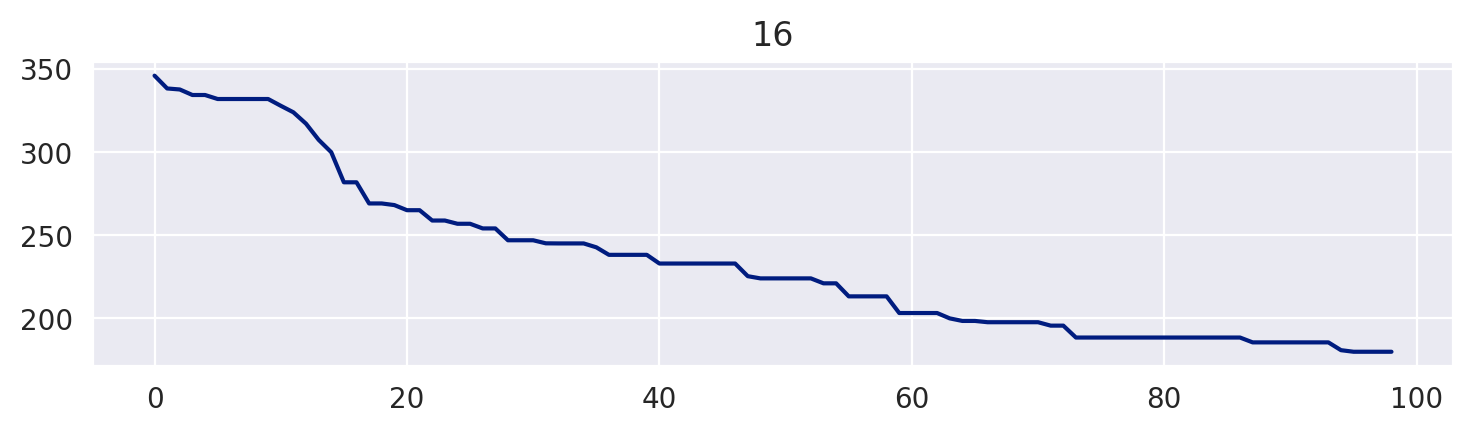

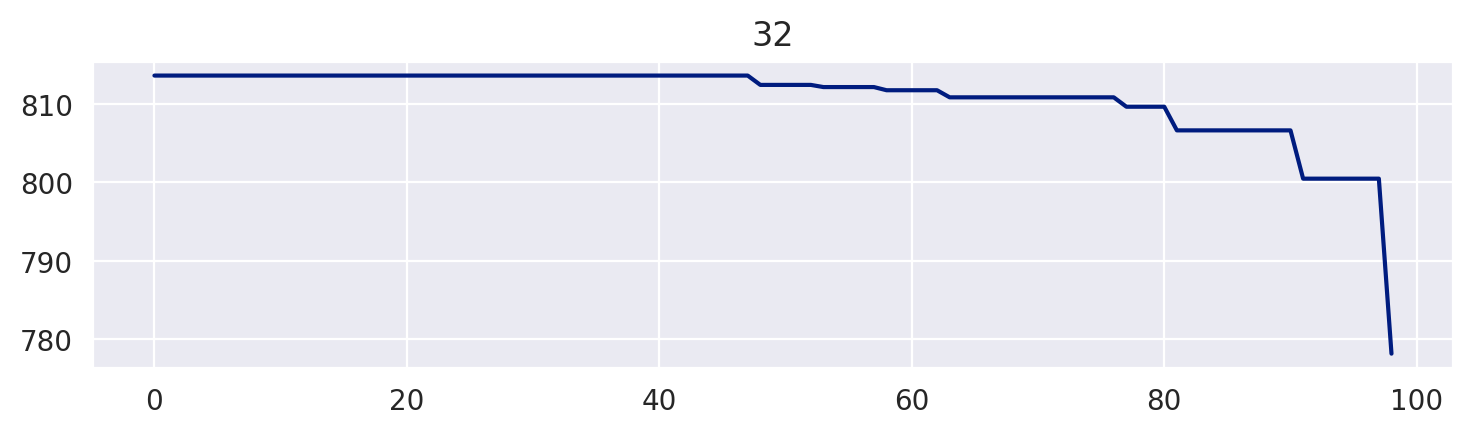

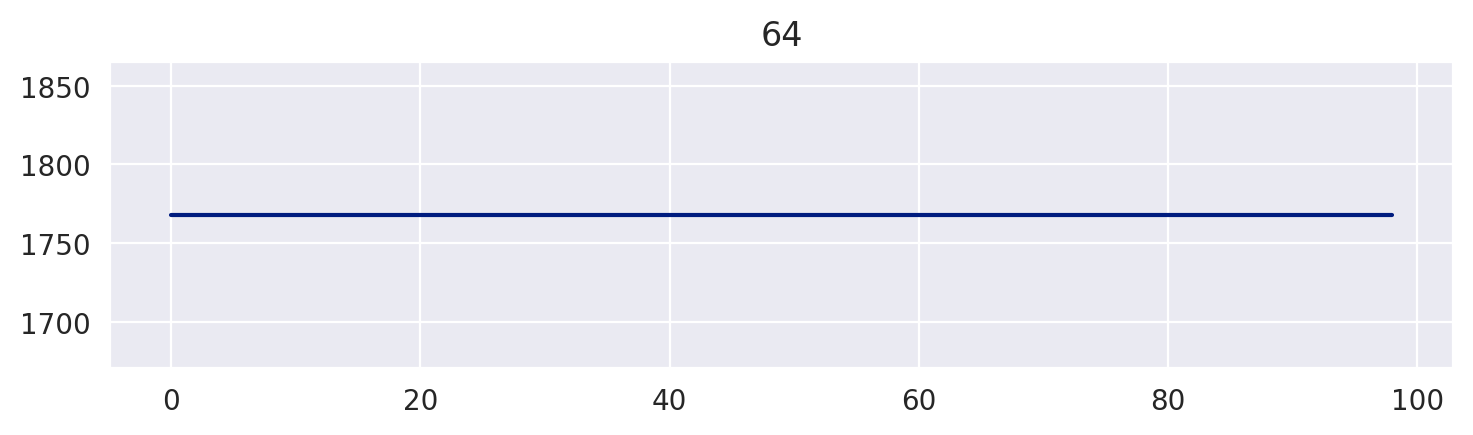

In [9]:
for ln in lengths:
	utils.quickplot(arch.where("chromosome_length", ln).f.to_numpy()[0], title=str(ln))

## Benchmarks

In [14]:
def simulation(benchmark, learning_rate, joined_sampling):
	N = 100
	return sum(esx(10, 10, objective=benchmark, learning_rate=learning_rate, joined_sampling=joined_sampling, steps=100) for _ in range(N)) / N

arch = utils.Archives(
	simulation, 
	benchmark = [
		benchmarks.sphere,
		benchmarks.rastrigin,
		benchmarks.griewank,
		benchmarks.rosenbrock,
		benchmarks.schwefel
	],
	learning_rate = [0.25, 0.5, 1, 2, 4],
	joined_sampling = [True, False]
)

### Sphere

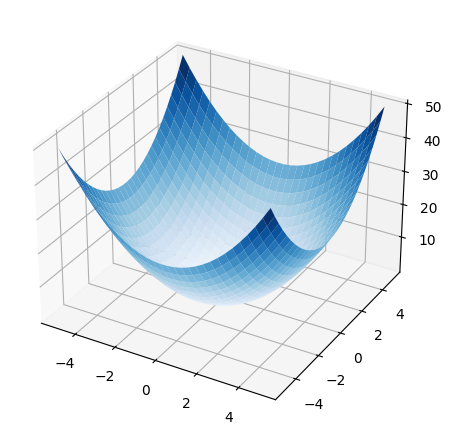

In [18]:
utils.surfplotf(benchmarks.sphere, -5, 5, 30)

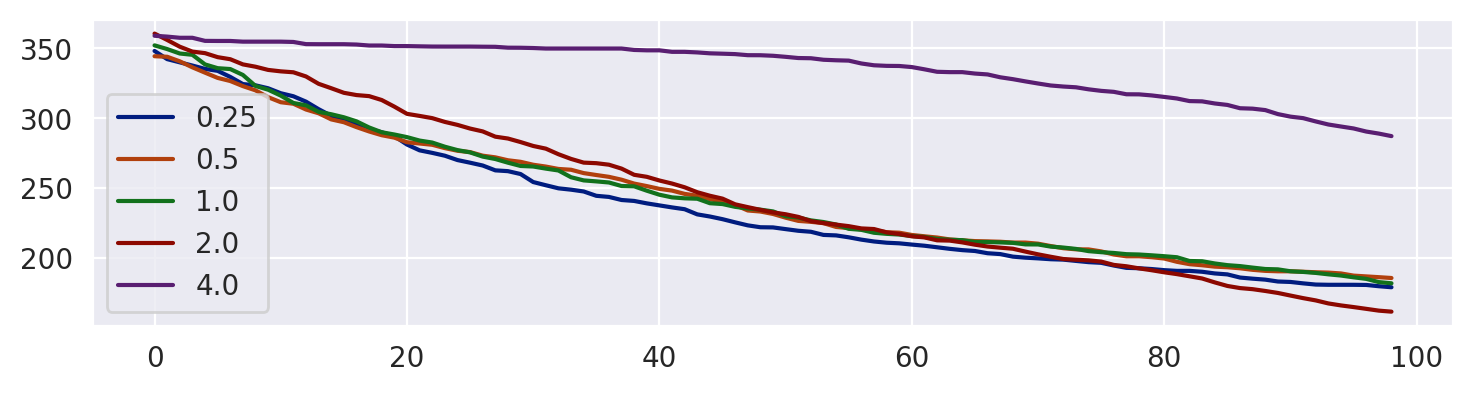

In [22]:
sphere = arch.where("benchmark", benchmarks.sphere).where("joined_sampling", True)
utils.quickplot(*sphere.f.to_numpy(), legend=sphere.keys.to_numpy().ravel())

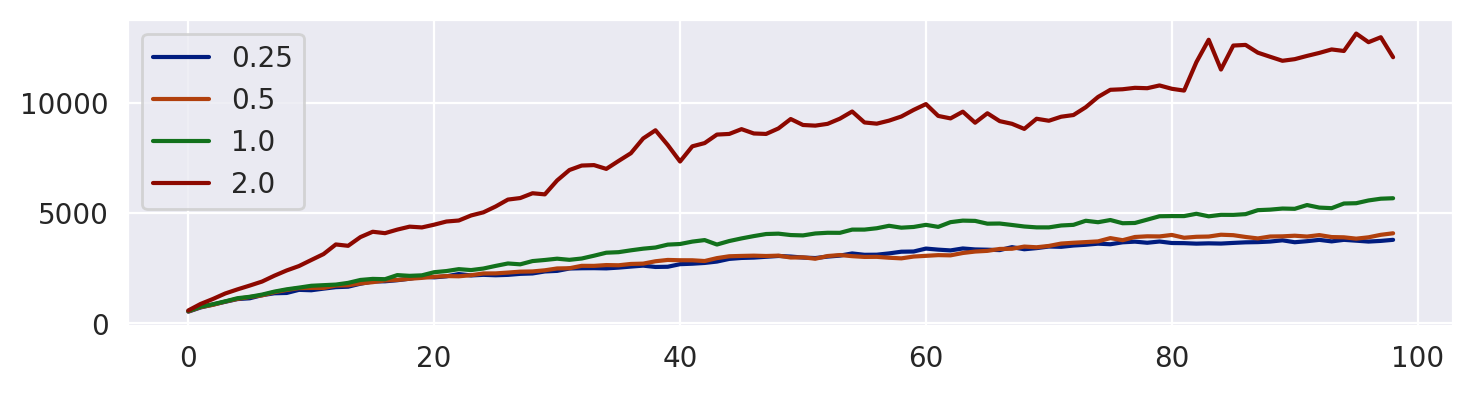

In [40]:
sphere = arch.where("benchmark", benchmarks.sphere).where("joined_sampling", False)
utils.quickplot(*sphere.f.to_numpy()[:-1], legend=sphere.keys.to_numpy()[:-1].ravel())

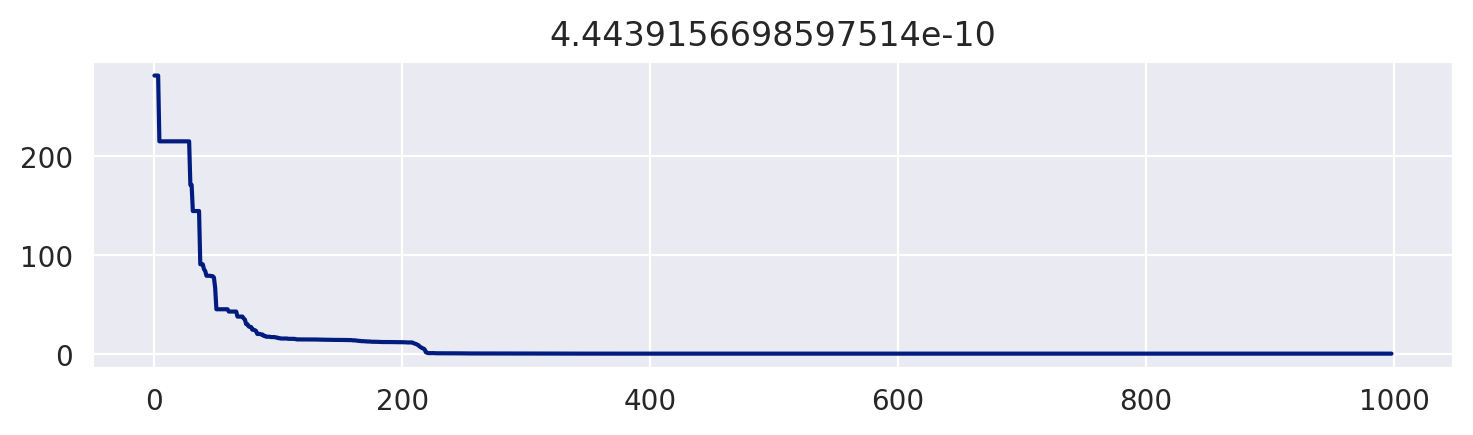

In [114]:
e = esx(50, 50, objective=benchmarks.sphere, learning_rate=2, steps=1000)
utils.quickplot(e, title=e[-1])

### Rastrigin

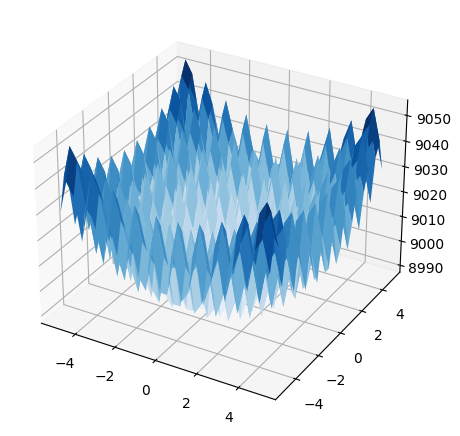

In [23]:
utils.surfplotf(benchmarks.rastrigin, -5, 5, 30)

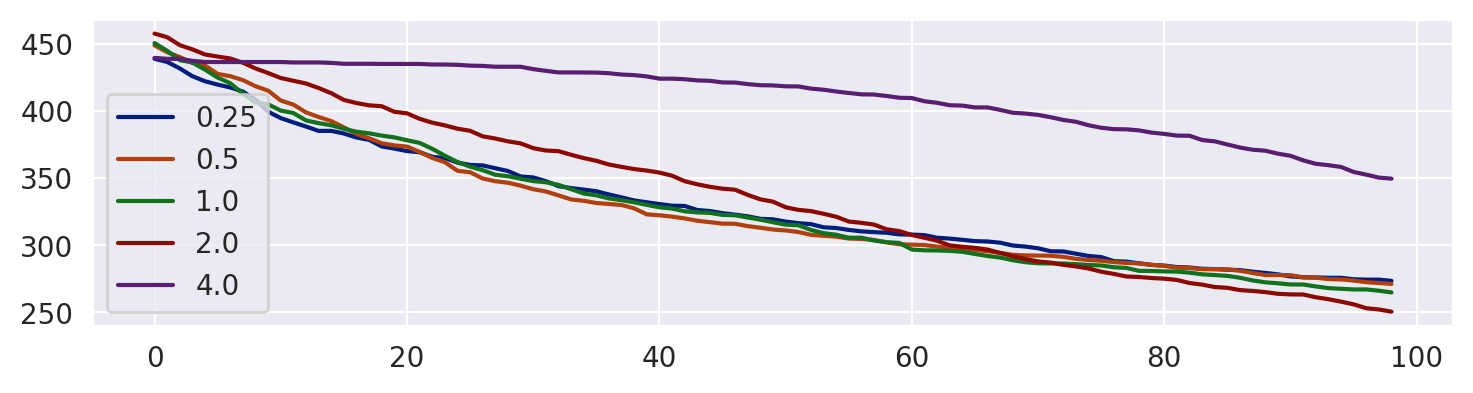

In [41]:
rastrigins = arch.where("benchmark", benchmarks.rastrigin).where("joined_sampling", True)
utils.quickplot(*rastrigins.f.to_numpy(), legend=rastrigins.keys.to_numpy().ravel())

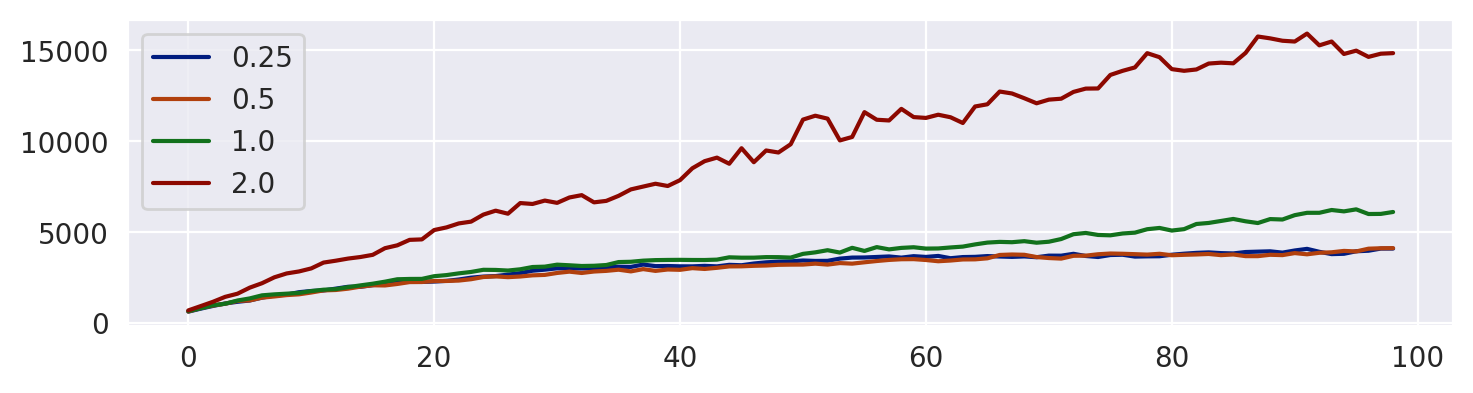

In [43]:
rastrigins = arch.where("benchmark", benchmarks.rastrigin).where("joined_sampling", False)
utils.quickplot(*rastrigins.f.to_numpy()[:-1], legend=rastrigins.keys.to_numpy()[:-1].ravel())

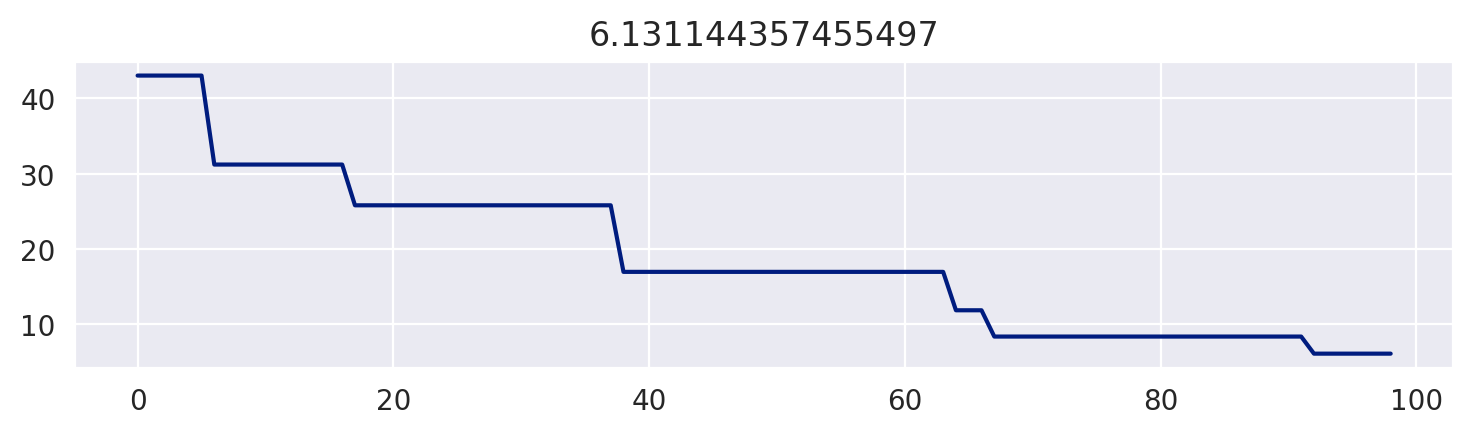

In [132]:
e = esx(100, 20, objective=benchmarks.rastrigin, learning_rate=1, steps=1000)
utils.quickplot(e, title=e[-1])

### Schwefel

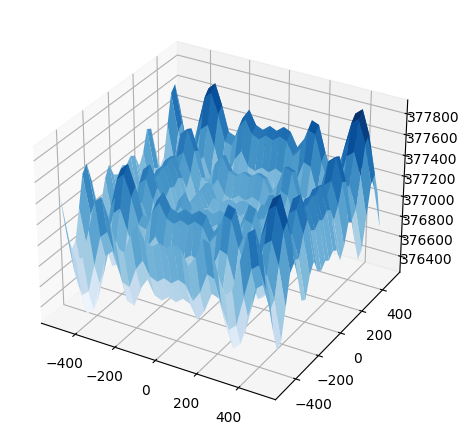

In [24]:
utils.surfplotf(benchmarks.schwefel, -500, 500, 30)

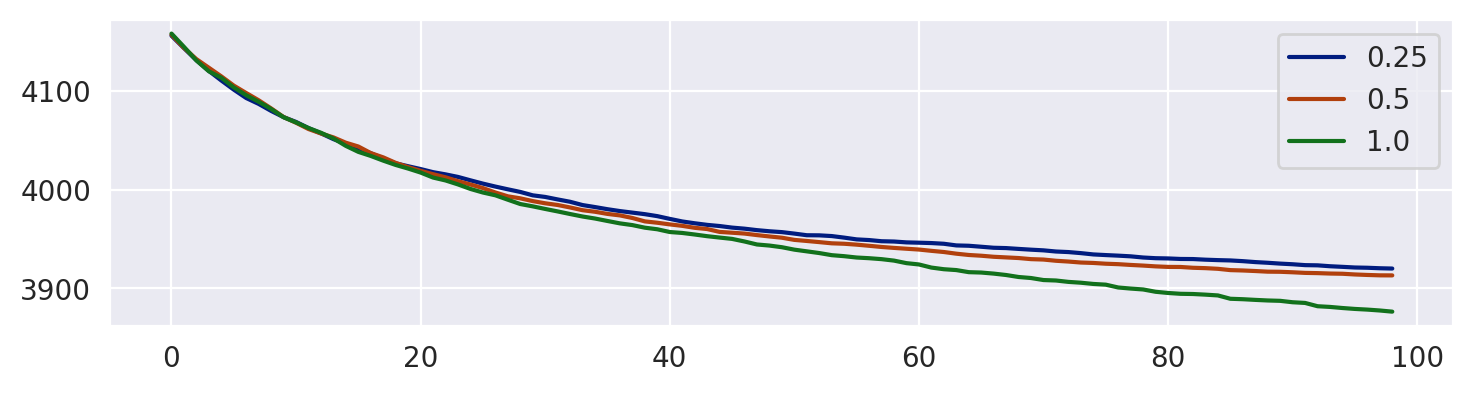

In [48]:
schwefel = arch.where("benchmark", benchmarks.schwefel).where("joined_sampling", True)
utils.quickplot(*schwefel.f.to_numpy()[:-2], legend=schwefel.keys.to_numpy()[:-2].ravel())

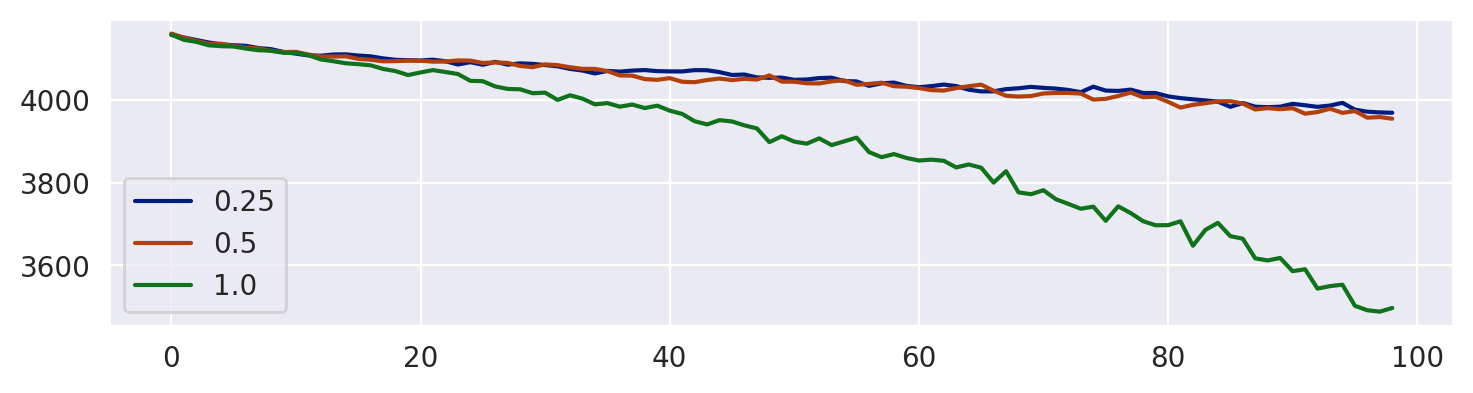

In [47]:
schwefel = arch.where("benchmark", benchmarks.schwefel).where("joined_sampling", False)
utils.quickplot(*schwefel.f.to_numpy()[:-2], legend=schwefel.keys.to_numpy()[:-2].ravel())

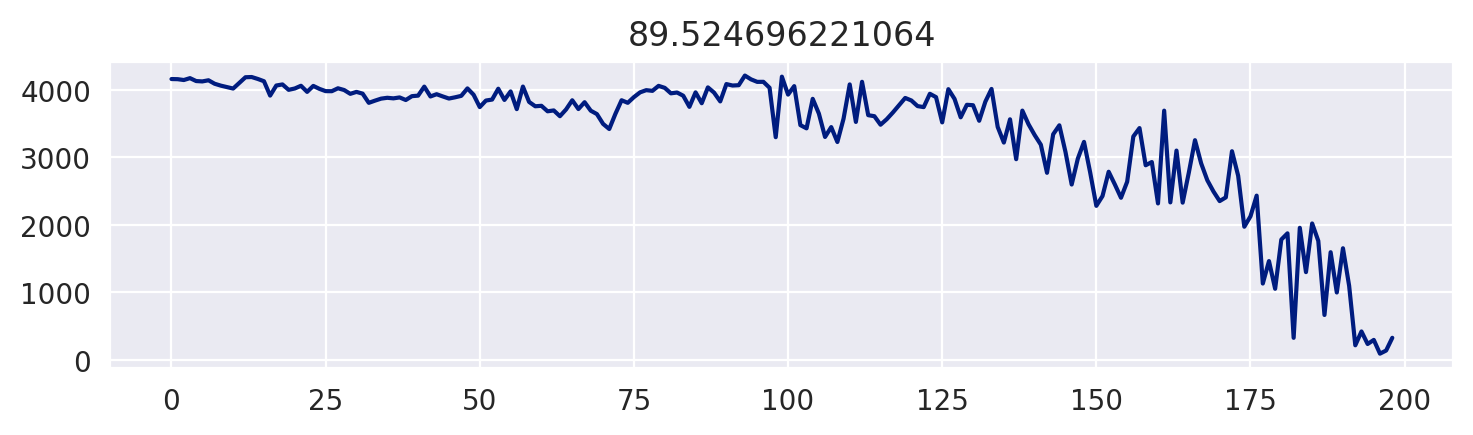

In [191]:
e = esx(100, 10, objective=benchmarks.schwefel, learning_rate=1, joined_sampling = False, steps=200)
utils.quickplot(e, title=min(e))

### Griewank

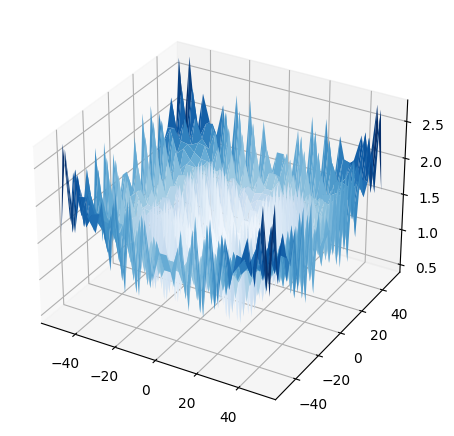

In [25]:
utils.surfplotf(benchmarks.griewank, -50, 50, 30)

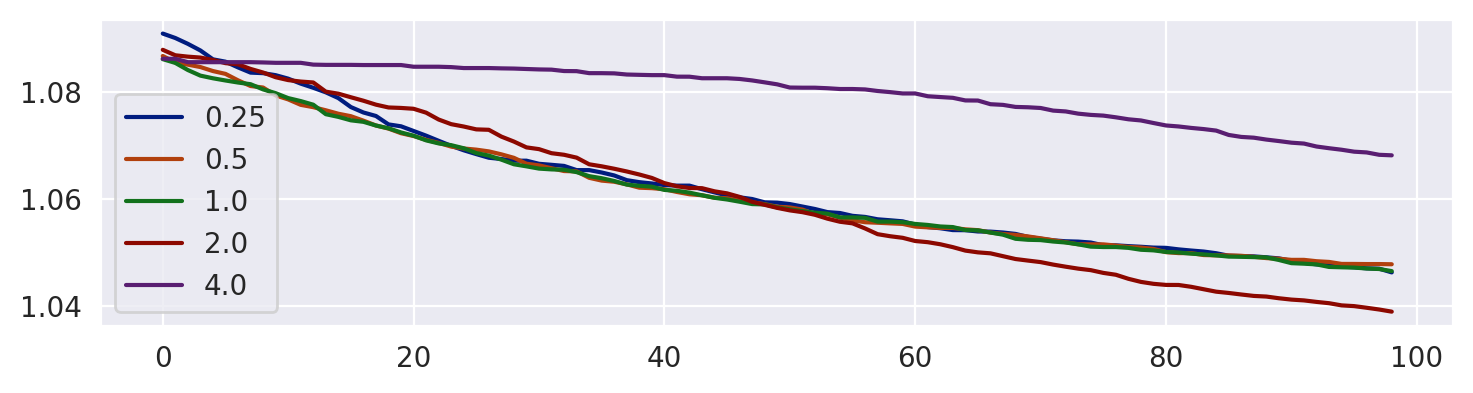

In [28]:
griewank = arch.where("benchmark", benchmarks.griewank).where("joined_sampling", True)
utils.quickplot(*griewank.f.to_numpy(), legend=griewank.keys.to_numpy().ravel())

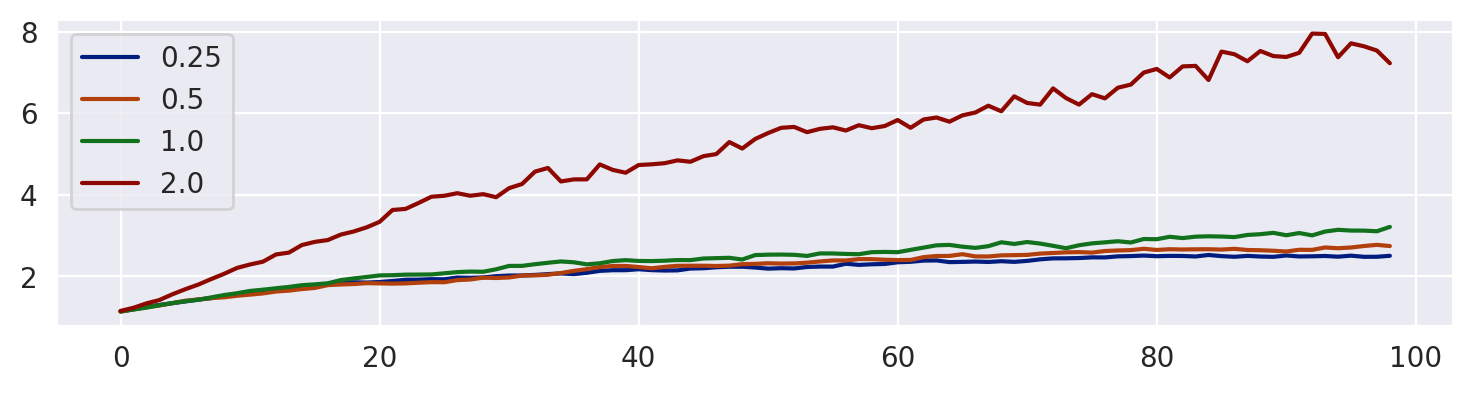

In [35]:
griewank = arch.where("benchmark", benchmarks.griewank).where("joined_sampling", False)
utils.quickplot(*griewank.f.to_numpy()[:-1], legend=griewank.keys.to_numpy()[:-1].ravel())

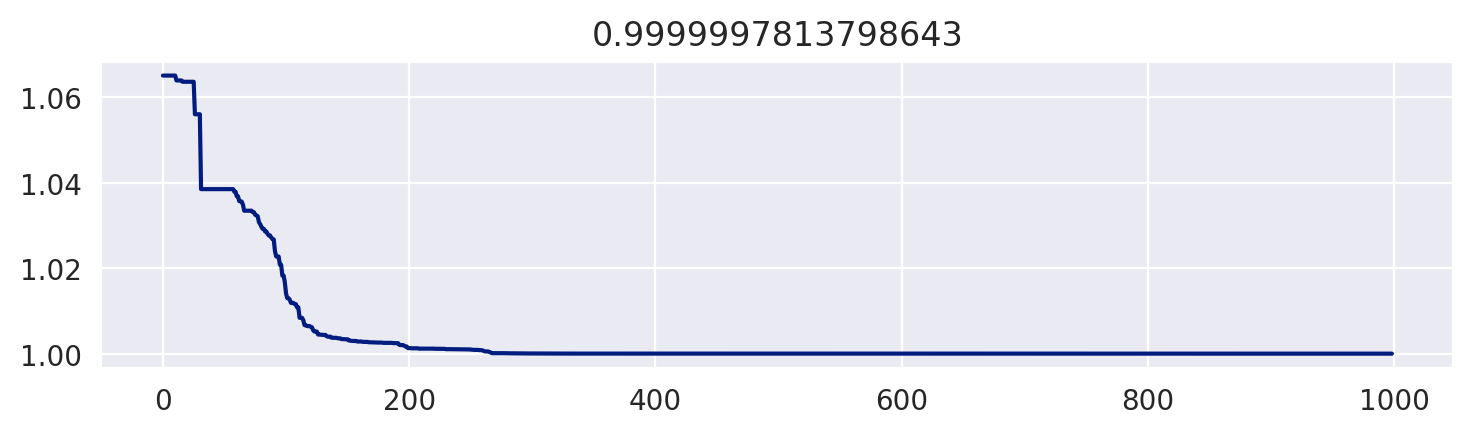

In [165]:
e = esx(100, 100, objective=benchmarks.griewank, learning_rate=2, steps=1000)
utils.quickplot(e, title=e[-1])

### Rosenbrock

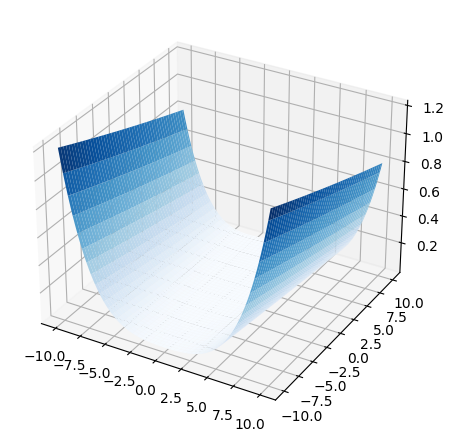

In [26]:
utils.surfplotf(benchmarks.rosenbrock, -10, 10, 100)

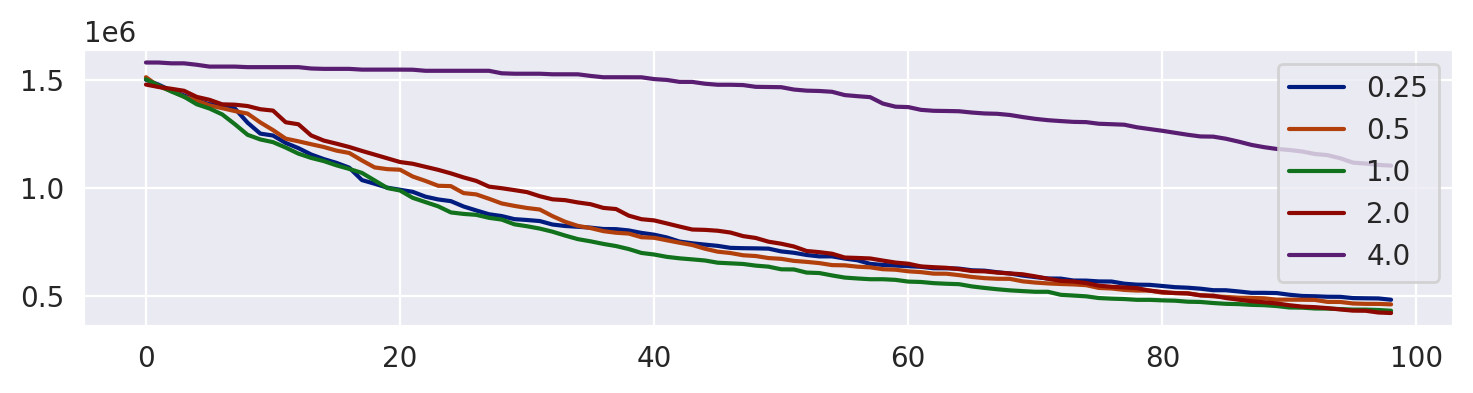

In [29]:
rosenbrock = arch.where("benchmark", benchmarks.rosenbrock).where("joined_sampling", True)
utils.quickplot(*rosenbrock.f.to_numpy(), legend=rosenbrock.keys.to_numpy().ravel())

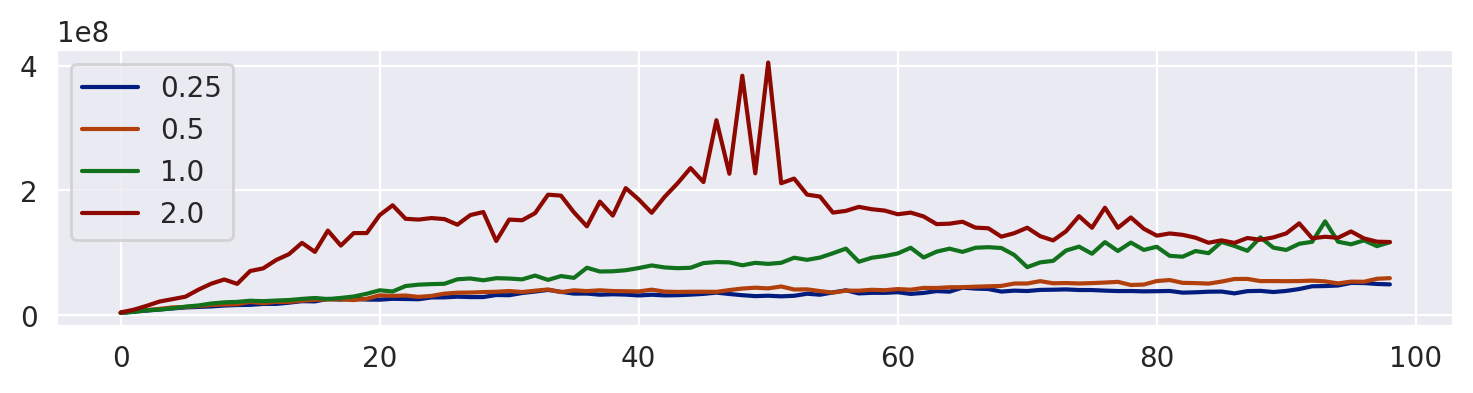

In [49]:
rosenbrock = arch.where("benchmark", benchmarks.rosenbrock).where("joined_sampling", False)
utils.quickplot(*rosenbrock.f.to_numpy()[:-1], legend=rosenbrock.keys.to_numpy()[:-1].ravel())

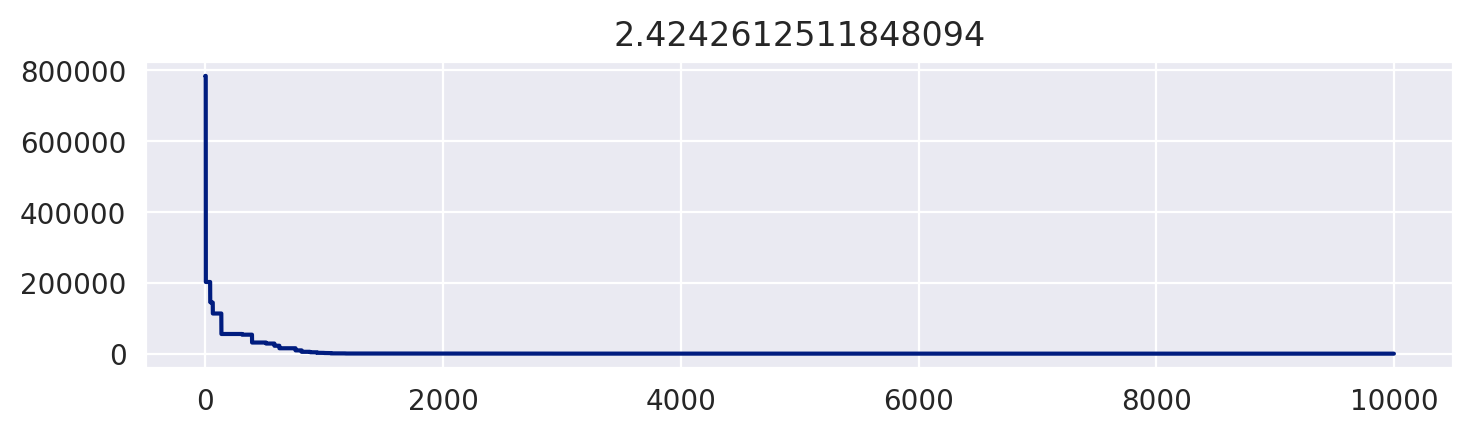

In [171]:
e = esx(100, 100, objective=benchmarks.rosenbrock, learning_rate=1, steps=10000)
utils.quickplot(e, title=e[-1])

## Population balancing

In [3]:
def simulation(µ, λ):
	return sum(esx(µ, λ, objective=benchmarks.rosenbrock, steps=32)[-1] for _ in range(10))

plane = np.arange(1, 100)
arch = utils.Archives(
	simulation, 
	µ = plane,
	λ = plane
)

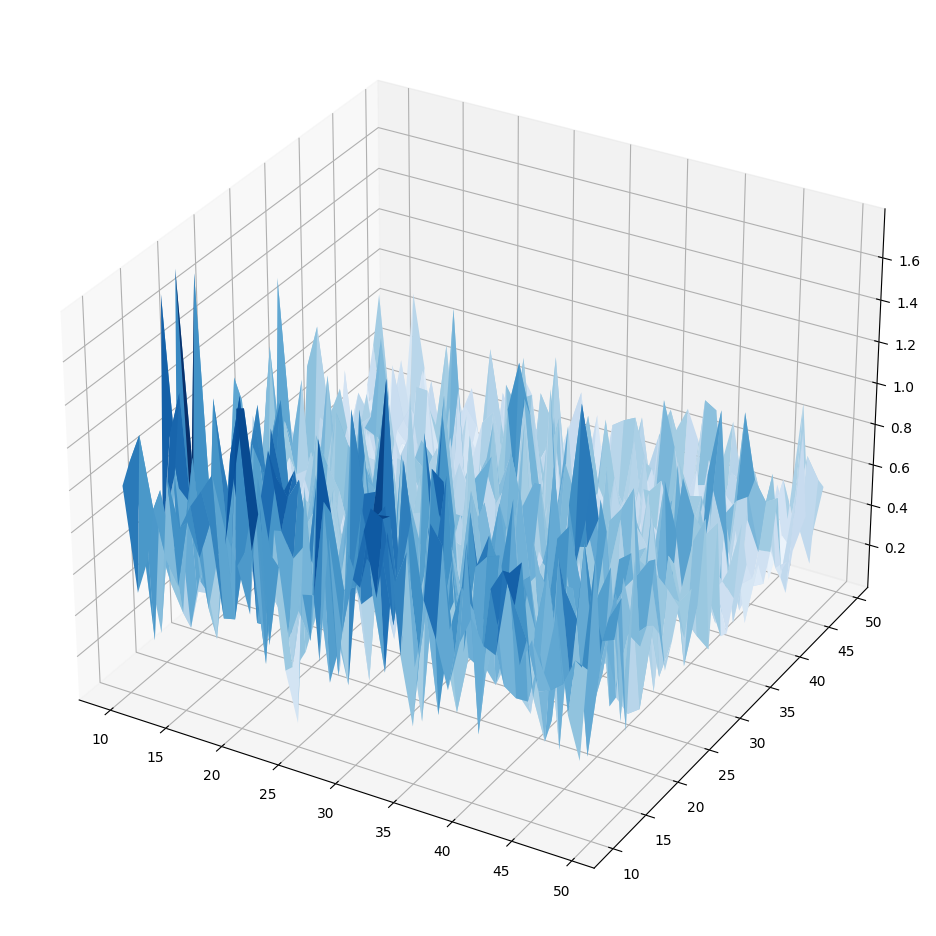

In [ ]:
data = arch.data
X = data.iloc[:, 0].to_numpy().reshape((99, 99))
Y = data.iloc[:, 1].to_numpy().reshape((99, 99))
Z = arch.f.to_numpy().reshape((99, 99))
utils.surfplot(X, Y, Z)